# Assignment 1 House Prices

### Due: Wednesday, April 17th, 11:59 pm on Canvas.

In this assignment we'll train a linear regression model to predict house prices. Fill in the cells provided with code to answer the questions.

Answer the questions on Canvas and make sure to download this file once you've finished the assignment and upload it to Canvas as well.

Copyright ©2018 Emily Fox.  All rights reserved.  Permission is hereby granted to students registered for University of Washington CSE/STAT 416 for use solely during Spring Quarter 2018 for purposes of the course.  No other use, copying, distribution, or modification is permitted without prior written consent. Copyrights for third-party components of this work must be honored.  Instructors interested in reusing these course materials should contact the author.

**Important note about file locations**

The `data` folder that you received from assignment 0 should be saved in the `root` directory. For Windows that is inside the `C:` drive, and for MacOs it is the `/` directory. 

To access `root` on File Explorer on Windows simply click on This PC in the sidebar and click into LocalDisk(C:)

To access `root` on Finder on Mac, click on 'Go' in the top bar and find 'Go To Folder' in the drop down menu. Then type `/` into the field and press 'go'. 

Alternatively you could open Terminal on Mac or Powershell on Windows and type `cd /`, then type `open .` for Mac or `explorer .` for Windows. 

Once you've opened the `root` directory you can drag and drop the `data` folder into its correct location.

In [1]:
import pandas as pd # import pandas and name it pd so we have to type less

In [2]:
sales = pd.read_csv('/data/home_data.csv') # The dataset is stored in '/data/home_data.csv'.
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Q1) How many houses do we have in our data set? Which column are we trying to predict given the other features (i.e. what's our output `y`)? How many inputs do we have in total in the data set (i.e. what is the size of our input `x`)?

Hint: You can use `len()` to get the length of anything in python. Note that when you use it on a DataFrame, it will give you the number of rows, not columns.

a) 21613 houses, price, 20  
b) 21613 houses, bedrooms, 21  
c) 22014 houses, price, 21  
d) 22014 houses, bedrooms, 20  
e) 21613 houses, price, 21

In [3]:
len(sales) # the number of houses


21613

### Q2) What is the average price for the zipcode (neighborhood) with the most expensive house?

a) 75,000  
b) 7,700,000  
c) 540,088  
d) 2,160,607  
e) 901,258  

First find the zipcode with the highest listed house price.

In [8]:
max_price = sales['price'].max()
sales[sales['price'] == max_price]['zipcode']
code = 98102

Now find the average price of all the rows with that zipcode.  

In [9]:
sales[sales['zipcode'] == code]['price'].mean()

901258.2380952381

### Q3) What fraction of properties are 2000-4000 sqft_living?

a) .2-.3 
b) .3-.4 
c) .4-.5 
d) .5-.6 
e) .6-.7 

Find the number of rows where sqft_living >= 2000 and sqft_living < 4000, and divide it by the total number of rows in the table.

In [10]:
len(sales[(sales['sqft_living'] >= 2000) & (sales['sqft_living'] < 4000)])/len(sales)

0.4263174941007727

## Training a Linear Regression Model.

We will now train a linear regression model to make useful predictions. Work through the steps below and then answer the following questions.


Here we're splitting the data into a training and test set.

In [11]:
from sklearn.model_selection import train_test_split # import the nessesary function to perform the split
train_data, test_data = train_test_split(sales, test_size = 0.2, random_state=0) # use random_state=0

Lets plot some of the data to get a sense of what we are dealing with

Text(0, 0.5, 'Price')

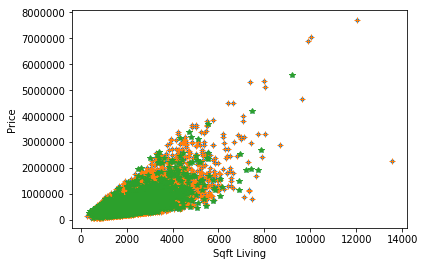

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(sales['sqft_living'],sales['price'],'.')
plt.plot(train_data['sqft_living'],train_data['price'],'+')
plt.plot(test_data['sqft_living'],test_data['price'],'*')
plt.xlabel('Sqft Living')
plt.ylabel('Price')

Now we're definining what our basic and advanced features we'll look at.

In [13]:
basic_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [14]:
advanced_features = ['condition', # condition of house
                     'grade', # measure of qality of construction
                     'waterfront', # waterfront property 
                     'view', # type of view
                     'sqft_above', # square feet above ground
                     'sqft_basement', # square feet in basement
                     'yr_built', # the year built
                     'yr_renovated', # the year renovated
                     'lat', 'long', # the lat-long of the parcel
                     'sqft_living15', # average sq.ft. of 15 nearest neighbors 
                     'sqft_lot15', # average lot size of 15 nearest neighbors 
                    ]

In [15]:
all_features = basic_features + advanced_features

Uncomment the following lines and fill in the parameters to create and train two linear regression models. One model should use only the basic features, and the other model should use all the features.

Find the `fit()` function in the API documentation and give it `X` and `Y`.

Look at the API for Sklearn's Linear Regression model here to understand how to use it:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [16]:
from sklearn.linear_model import LinearRegression
basic_model = LinearRegression().fit(train_data[basic_features], train_data['price'])
all_features_model = LinearRegression().fit(train_data[all_features], train_data['price'])

Now, evaluate the models on the test set and print the results.

### Q4) What are your RMSE errors on your training data using the basic model and all features model?
For the next two problems you will need to use the `mean_squared_error` function from sklearn

Here is it's documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

**Remember we are looking for the RMSE, NOT the MSE**

a) ~ 4090457, 4378167  
b) ~ 258527, 203805    
c) ~ 3157653, 3159982  
d) ~ 244005, 190473 

In [18]:
from sklearn.metrics import mean_squared_error # MSE function
rmse_basic = mean_squared_error(train_data['price'], basic_model.predict(train_data[basic_features])) ** (1/2)
rmse_all = mean_squared_error(train_data['price'], all_features_model.predict(train_data[all_features])) ** (1/2)
print(rmse_basic, rmse_all)

258524.68484833534 203805.41055524032


### Q5) What are your RMSE errors on your test data using the basic model and all features model?


a) ~ 4090457, 4378167  
b) ~ 258527, 203805    
c) ~ 3157653, 3159982  
d) ~ 244005, 190473  

In [56]:
rmse_basic = mean_squared_error(test_data['price'], basic_model.predict(test_data[basic_features])) ** (1/2)
rmse_all = mean_squared_error(test_data['price'], all_features_model.predict(test_data[all_features])) ** (1/2)
print(rmse_basic, rmse_all)

244004.7744310419 190473.37570967645


### Q6) a. Which model would you choose?

a) Model with the basic features  
b) Model with the all the features (o)


### b. Why?

a) It has higher training error  
b) It uses more features  
c) It has lower test error(o)

d) It has lower training error  
e) It has higher test error

### Q7) Using the basic features model, predict the house prices for the houses with ids 1336300445 and 2724200705. What are their predicted prices?

Remember, you can index into the DataFrame to find a particular id like this `sales[sales['id'] == ?]`.

a) ~ \$1265425, \$95000 respectively  
b) ~ \$1265000, \$95000 respectively  
c) ~ \$2200080, \$191428 respectively   
d) ~ \$868865, \$274584 respectively

In [19]:
basic_model.predict(sales[sales['id'] == 1336300445][basic_features])

array([868864.92944625])

In [20]:
basic_model.predict(sales[sales['id'] == 2724200705][basic_features])

array([274583.53567976])